<a href="https://colab.research.google.com/github/anushanthbalachandran/ML_Coursework_Telco_Customer_Churn/blob/main/2425477_20241130_Anushanth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Balachandran Anushanth
# RGU_ID-2425477
# IIT_ID-20241130

# Import_Data

In [162]:

# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive


In [163]:
# Install the seaborn library silently

!pip install seaborn --quiet

In [164]:
# This line mounts your Google Drive to the Colab environment.

drive.mount('/content/drive')

# Set default plotting style and seaborn theme for visualizations
plt.style.use("default")
sns.set_theme()

path = "/content/drive/MyDrive/ML_Dataset/archive/WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Read the CSV file into a pandas DataFrame
inputs = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exploratort_Data_Analysis(EDA)

In [165]:
# Print the shape of the DataFrame
print("Shape:", inputs.shape)

# Display the first few rows of the DataFrame
inputs.head()

Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [166]:
print("===== INFO ====")
# Print information about the DataFrame, including data types and non-null values
print(inputs.info())

print("\n===== DESCRIPTIVE STATS (NUMERIC) ====")
# Print descriptive statistics for numeric columns
print(inputs.describe())

print("\n====Duplicates=====")
# Print the sum of duplicate rows in the DataFrame
print(inputs.duplicated().sum())

===== INFO ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non

In [167]:
print("\n===== MISSING VALUES =====")
# Print the count of null values per column
print(inputs.isnull().sum())
# Print the count of NA/missing values per column
print(inputs.isna().sum())


===== MISSING VALUES =====
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [168]:
print("===== Blank values in every column =====")
for col in inputs.columns:
    rows = inputs[inputs[col].astype(str).str.strip() == ""]
    blanks = (inputs[col].astype(str).str.strip() == "").sum()
    print(f"{col}: {blanks}")
    if len(rows) > 0:
        print(f"\nRows with blanks in {col}:")
        display(rows)

===== Blank values in every column =====
customerID: 0
gender: 0
SeniorCitizen: 0
Partner: 0
Dependents: 0
tenure: 0
PhoneService: 0
MultipleLines: 0
InternetService: 0
OnlineSecurity: 0
OnlineBackup: 0
DeviceProtection: 0
TechSupport: 0
StreamingTV: 0
StreamingMovies: 0
Contract: 0
PaperlessBilling: 0
PaymentMethod: 0
MonthlyCharges: 0
TotalCharges: 11

Rows with blanks in TotalCharges:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Churn: 0


In [169]:
numeric_cols = inputs.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = [c for c in inputs.columns if inputs[c].dtype == "O" and c != "customerID"]

print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

Numeric Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges']
Categorical Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [170]:
# Checking unique values in categorical columns
print("\nUnique Values in Categorical Columns:")
print()
categorical_cols = inputs.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {inputs[col].nunique()} unique values")
    print(inputs[col].unique())
    print()
    print(inputs[col].value_counts())
    print()
    print()


Unique Values in Categorical Columns:

customerID: 7043 unique values
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64


gender: 2 unique values
['Female' 'Male']

gender
Male      3555
Female    3488
Name: count, dtype: int64


Partner: 2 unique values
['Yes' 'No']

Partner
No     3641
Yes    3402
Name: count, dtype: int64


Dependents: 2 unique values
['No' 'Yes']

Dependents
No     4933
Yes    2110
Name: count, dtype: int64


PhoneService: 2 unique values
['No' 'Yes']

PhoneService
Yes    6361
No      682
Name: count, dtype: int64


MultipleLines: 3 unique values
['No phone service' 'No' 'Yes']

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


InternetServ

In [171]:
# Count of 'unknown' values in categorical columns
for col in categorical_cols:
    unknown_count = (inputs[col] == 'unknown').sum()
    total_count = len(inputs)
    print(f"\nProcessing column: {col}")
    print(f"  'unknown' values: {unknown_count} out of {total_count} ({(unknown_count / total_count) * 100:.2f}%)")


Processing column: customerID
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: gender
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: Partner
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: Dependents
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: PhoneService
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: MultipleLines
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: InternetService
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: OnlineSecurity
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: OnlineBackup
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: DeviceProtection
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: TechSupport
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: StreamingTV
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: StreamingMovies
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: Contract


In [172]:
# Value counts for the target variable
print("\nTarget Variable Distribution:")
print(inputs['Churn'].value_counts())

# Value counts percentage for the target variable
print(inputs["Churn"].value_counts(normalize=True)*100)


Target Variable Distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


# Data_Visualization

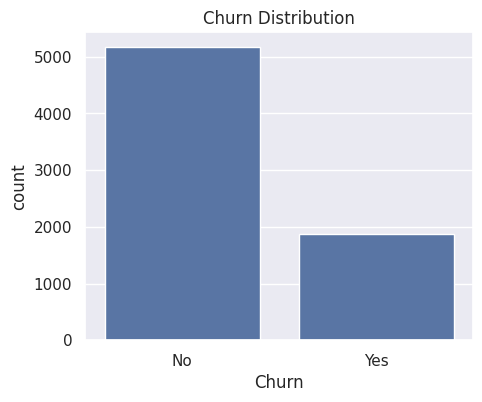

In [173]:
# Churn Distribution
plt.figure(figsize=(5,4))
sns.countplot(data=inputs, x="Churn")
plt.title("Churn Distribution")
plt.show()

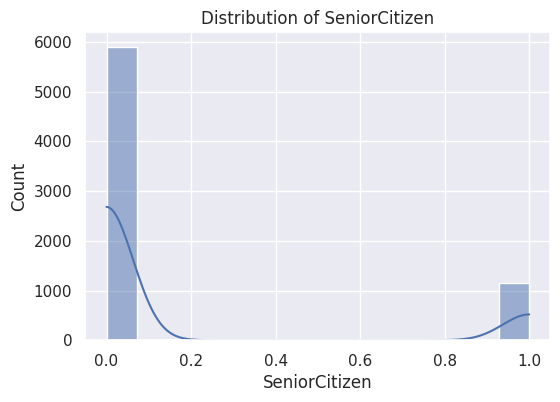

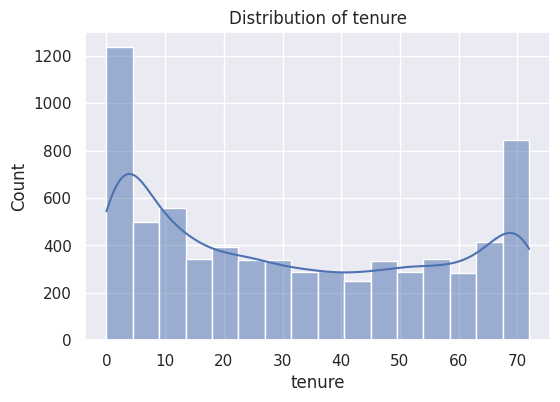

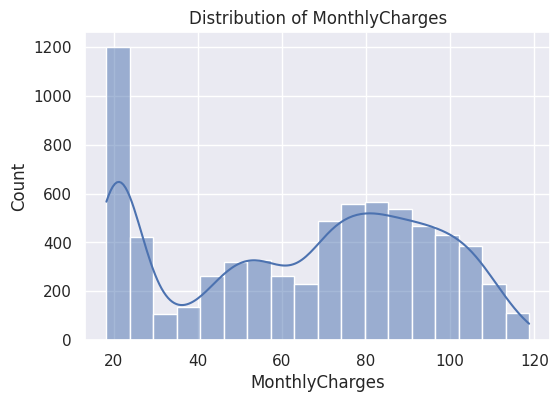

In [174]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(inputs[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

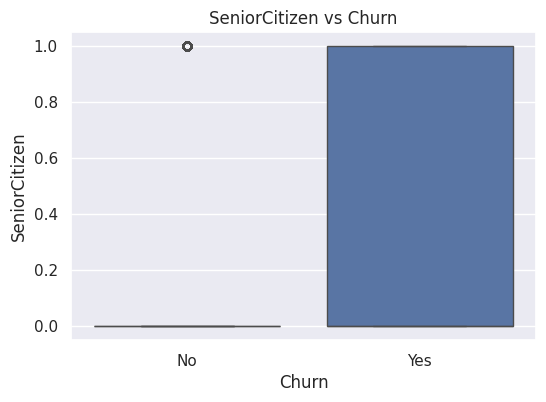

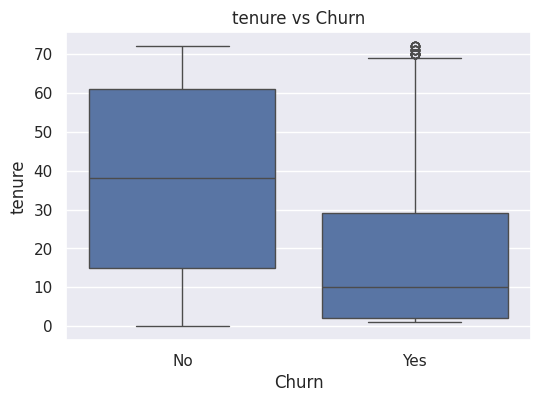

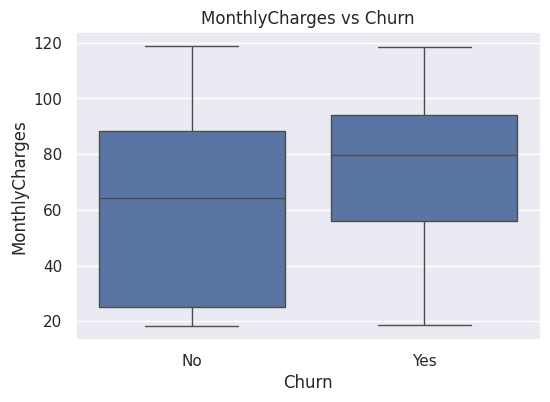

In [175]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=inputs, x="Churn", y=col)
    plt.title(f"{col} vs Churn")
    plt.show()


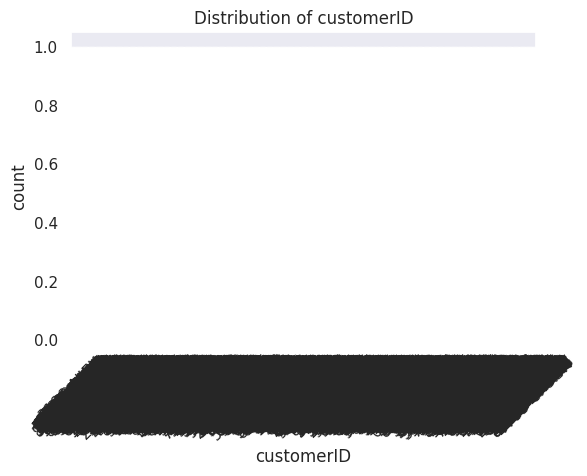

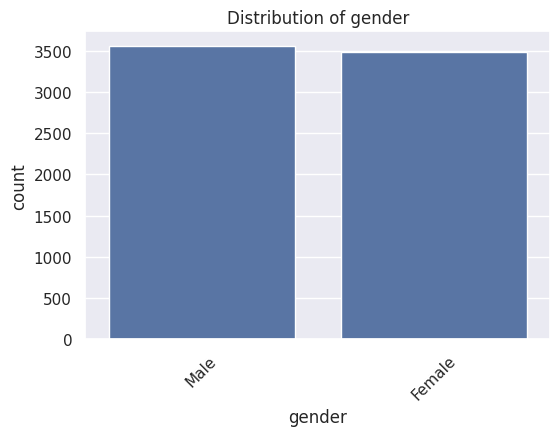

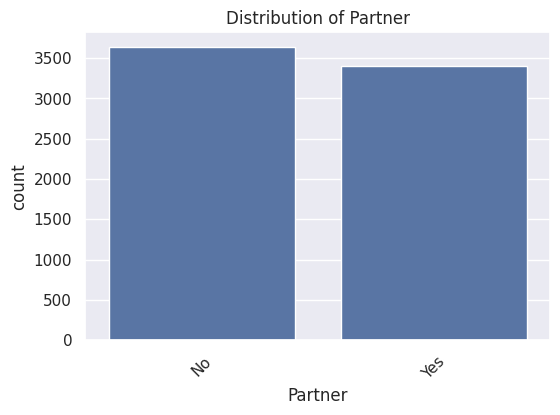

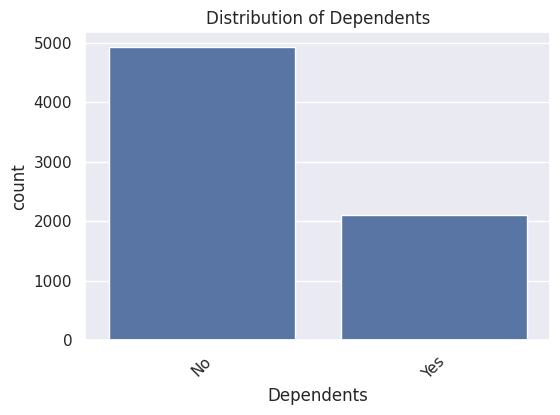

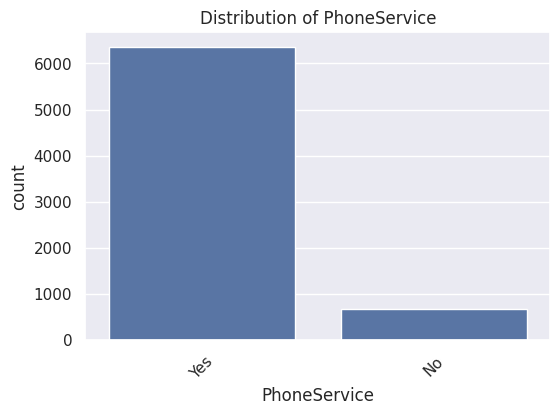

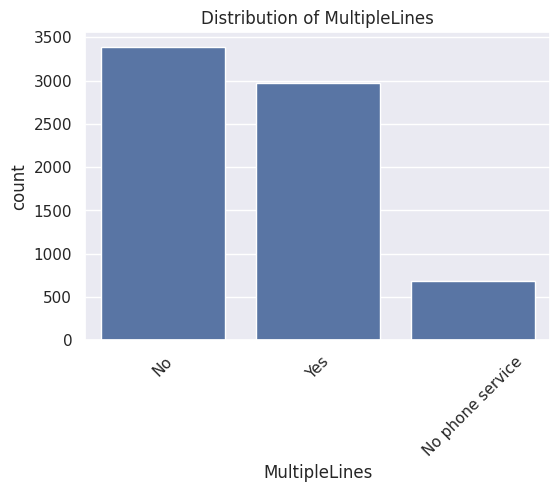

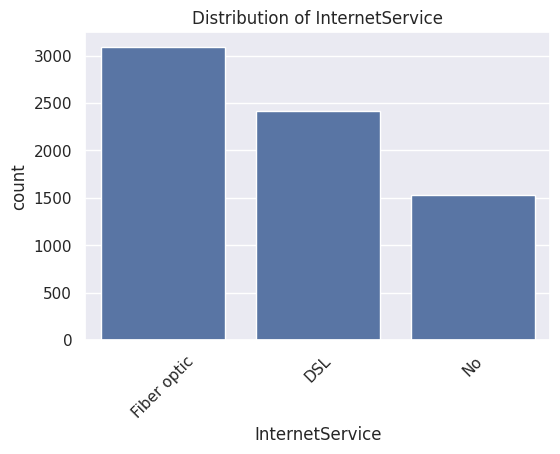

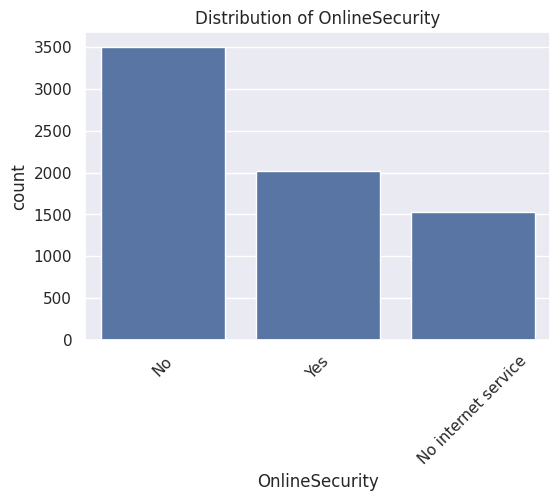

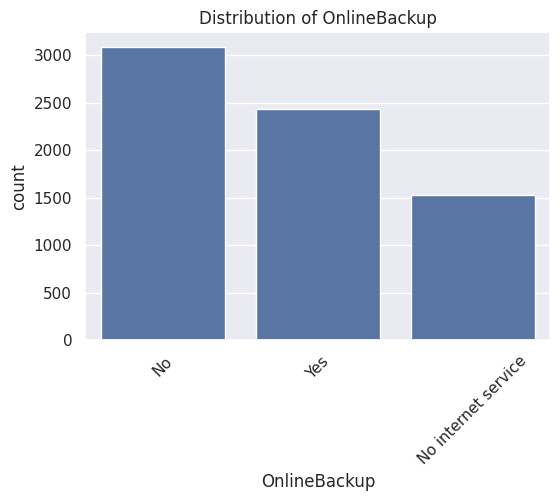

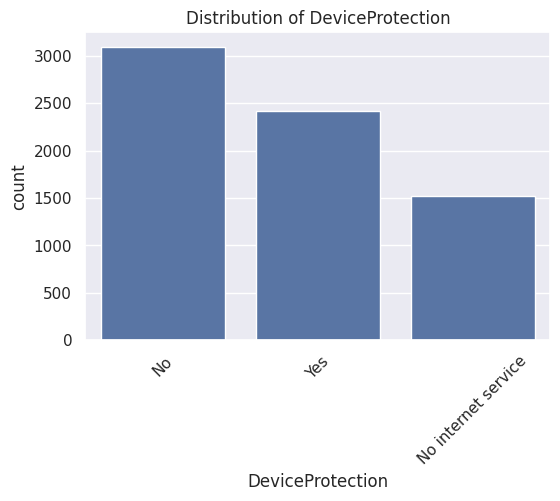

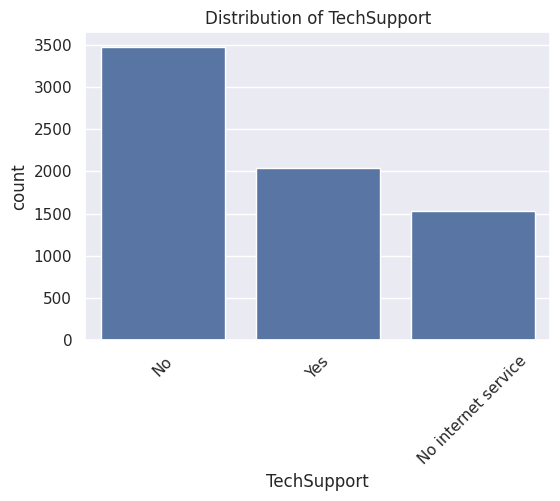

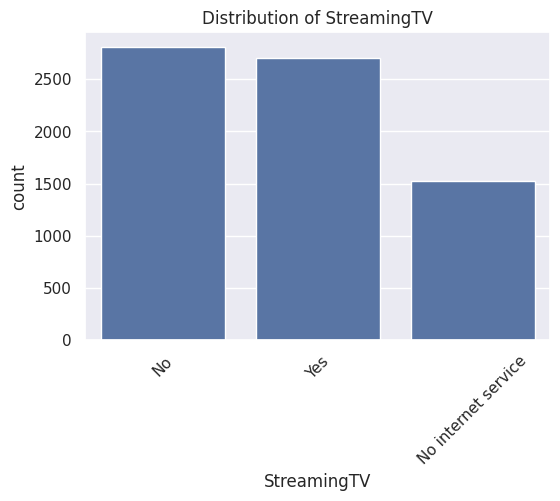

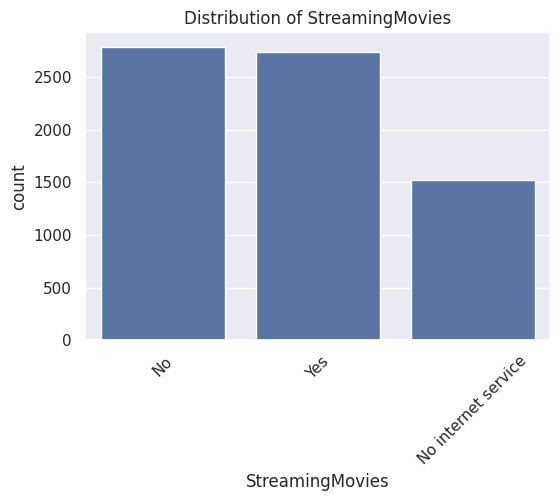

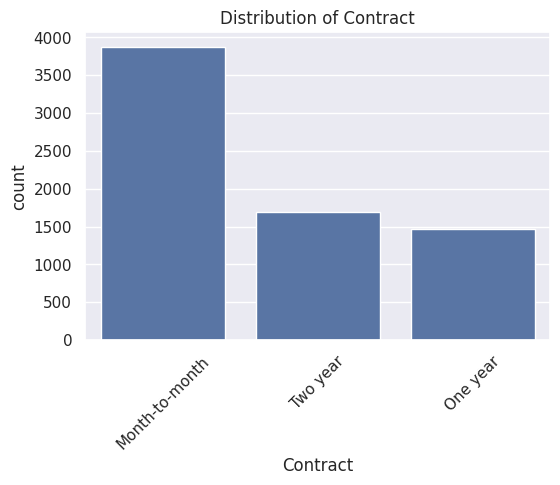

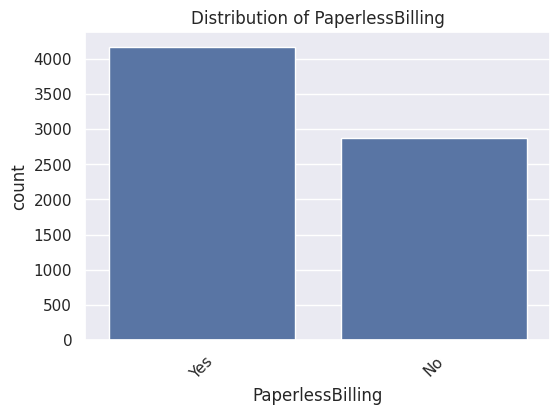

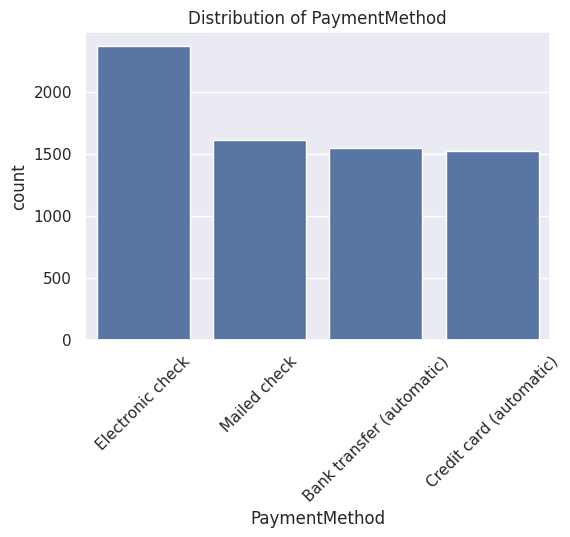

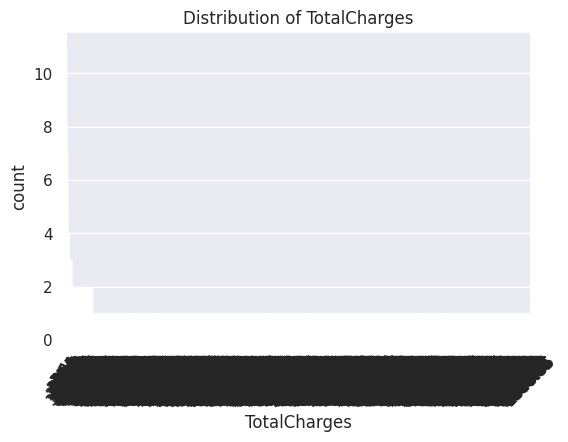

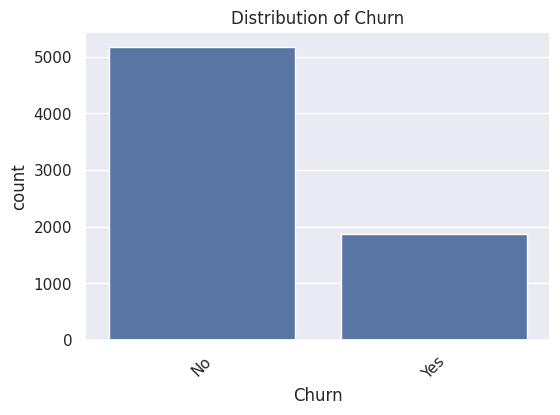

In [176]:
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=inputs, x=col, order=inputs[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

Churn          No    Yes
customerID              
0002-ORFBO  100.0    0.0
0003-MKNFE  100.0    0.0
0004-TLHLJ    0.0  100.0
0011-IGKFF    0.0  100.0
0013-EXCHZ    0.0  100.0
...           ...    ...
9987-LUTYD  100.0    0.0
9992-RRAMN    0.0  100.0
9992-UJOEL  100.0    0.0
9993-LHIEB  100.0    0.0
9995-HOTOH  100.0    0.0

[7043 rows x 2 columns]


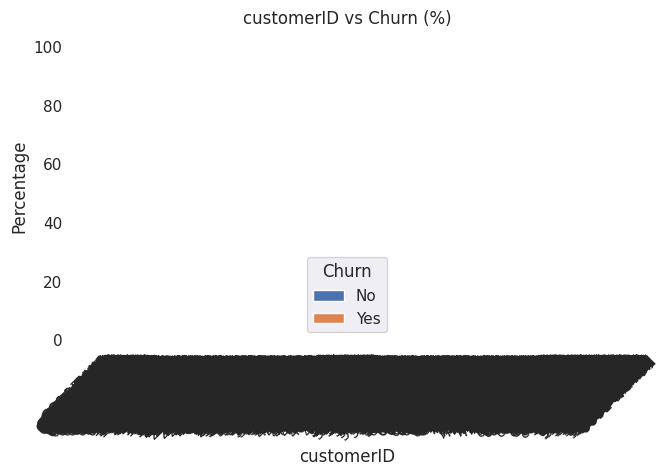

Churn          No        Yes
gender                      
Female  73.079128  26.920872
Male    73.839662  26.160338


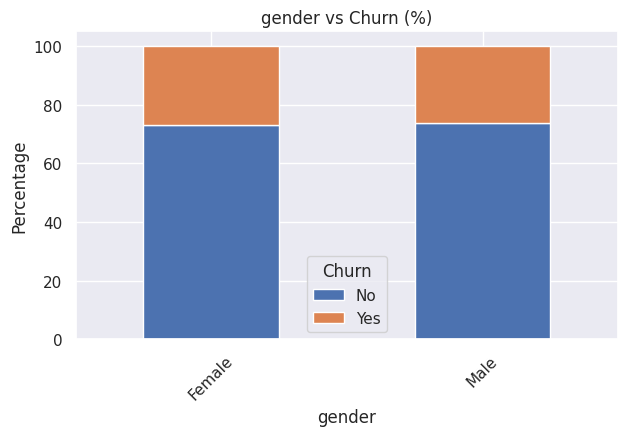

Churn           No        Yes
Partner                      
No       67.042021  32.957979
Yes      80.335097  19.664903


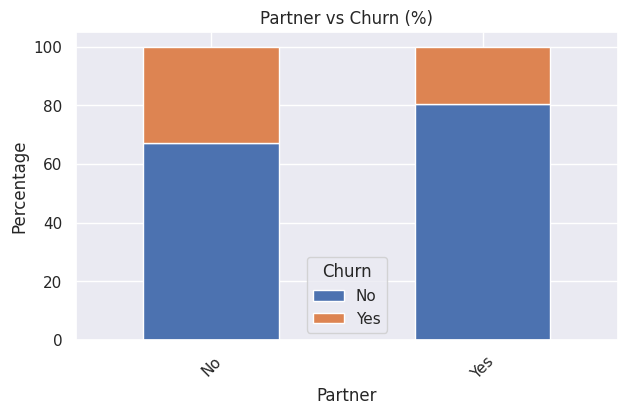

Churn              No        Yes
Dependents                      
No          68.720860  31.279140
Yes         84.549763  15.450237


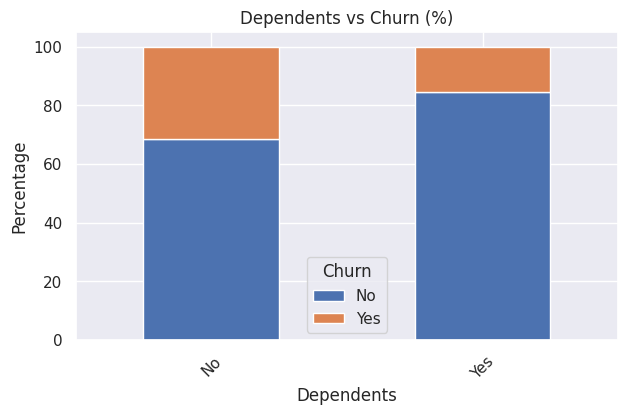

Churn                No        Yes
PhoneService                      
No            75.073314  24.926686
Yes           73.290363  26.709637


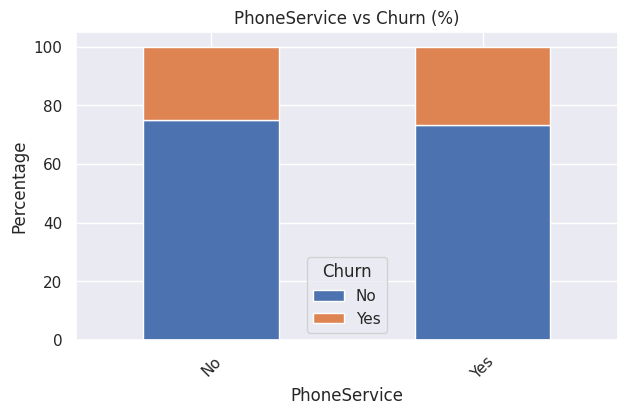

Churn                    No        Yes
MultipleLines                         
No                74.955752  25.044248
No phone service  75.073314  24.926686
Yes               71.390104  28.609896


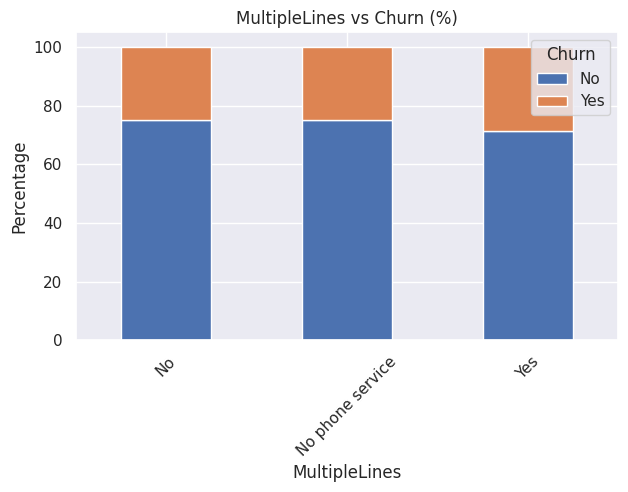

Churn                   No        Yes
InternetService                      
DSL              81.040892  18.959108
Fiber optic      58.107235  41.892765
No               92.595020   7.404980


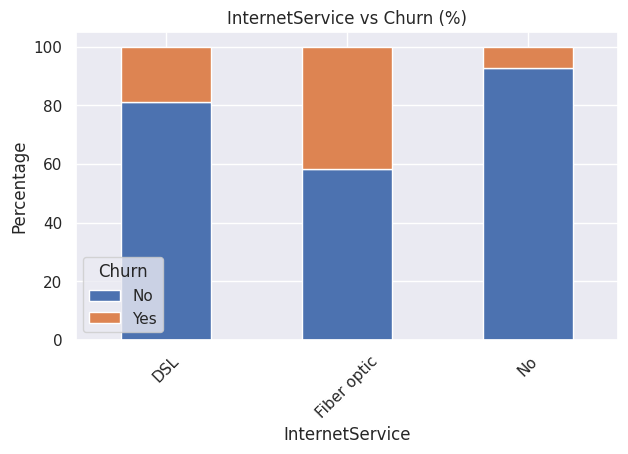

Churn                       No        Yes
OnlineSecurity                           
No                   58.233276  41.766724
No internet service  92.595020   7.404980
Yes                  85.388806  14.611194


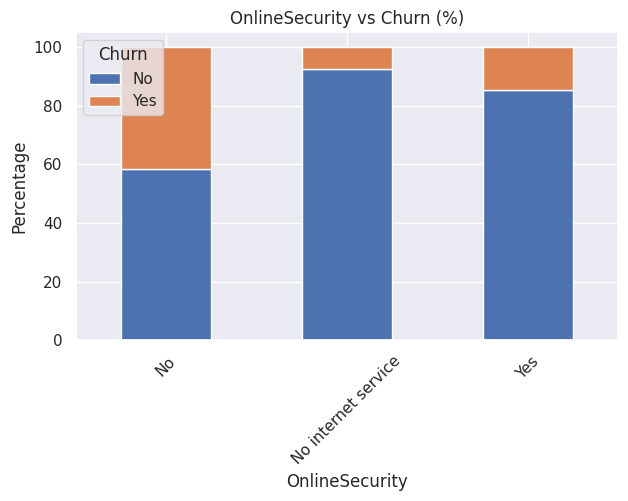

Churn                       No        Yes
OnlineBackup                             
No                   60.071244  39.928756
No internet service  92.595020   7.404980
Yes                  78.468506  21.531494


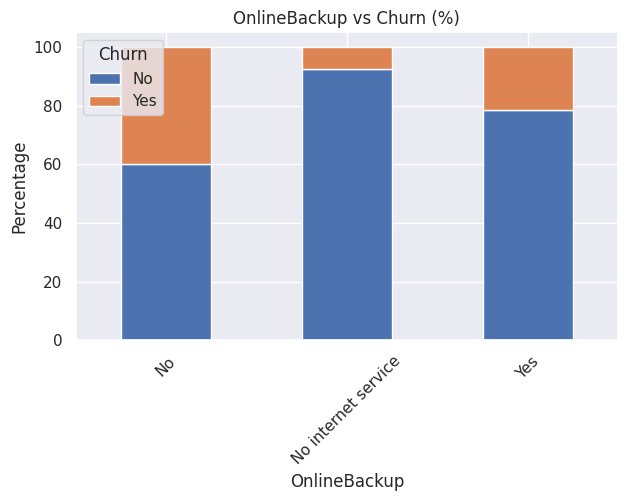

Churn                       No        Yes
DeviceProtection                         
No                   60.872375  39.127625
No internet service  92.595020   7.404980
Yes                  77.497936  22.502064


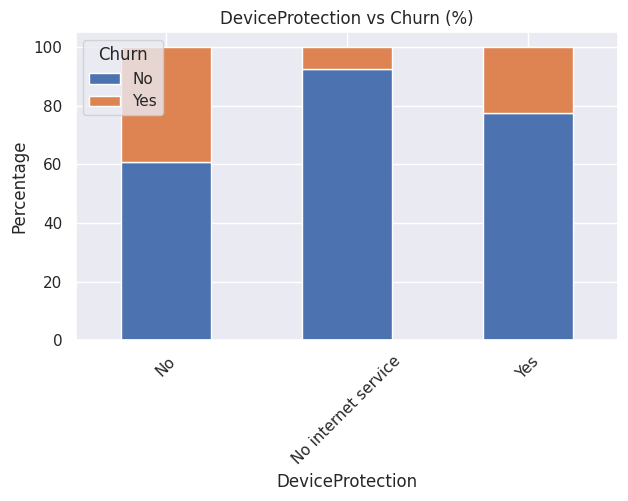

Churn                       No        Yes
TechSupport                              
No                   58.364526  41.635474
No internet service  92.595020   7.404980
Yes                  84.833659  15.166341


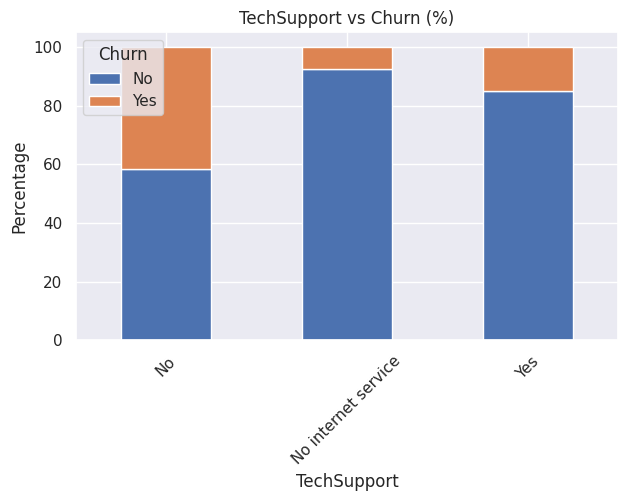

Churn                       No        Yes
StreamingTV                              
No                   66.476868  33.523132
No internet service  92.595020   7.404980
Yes                  69.929812  30.070188


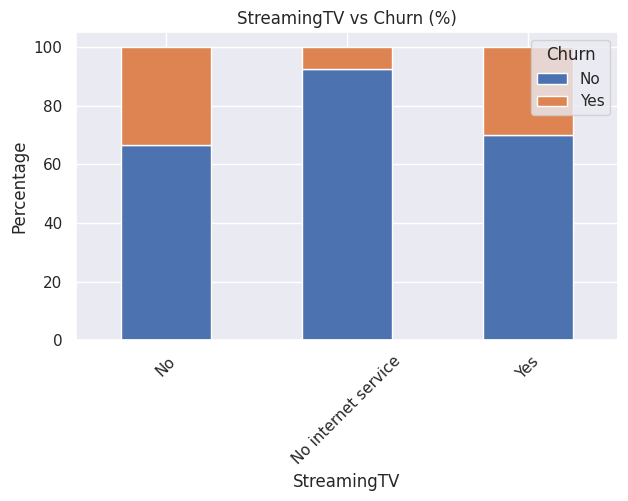

Churn                       No        Yes
StreamingMovies                          
No                   66.319569  33.680431
No internet service  92.595020   7.404980
Yes                  70.058565  29.941435


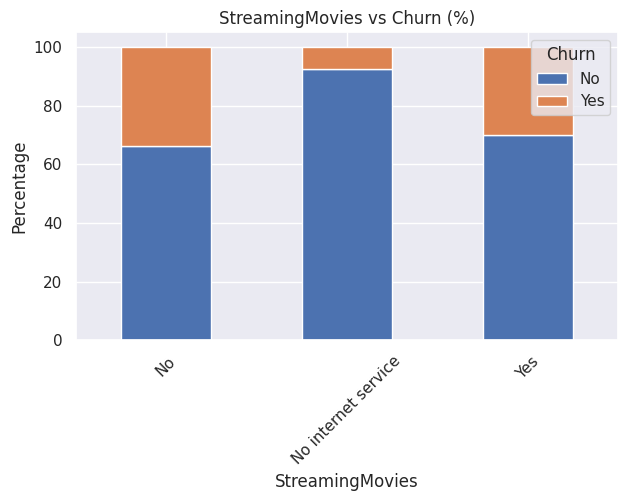

Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858


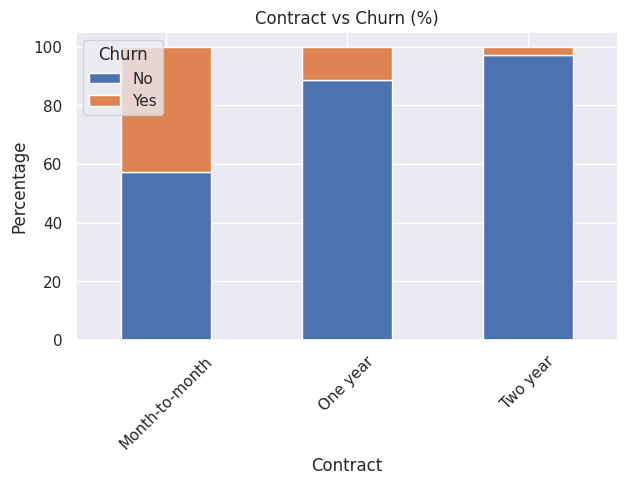

Churn                    No        Yes
PaperlessBilling                      
No                83.669916  16.330084
Yes               66.434908  33.565092


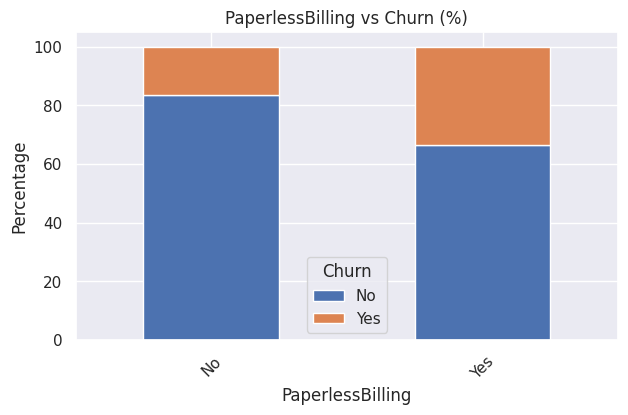

Churn                             No        Yes
PaymentMethod                                  
Bank transfer (automatic)  83.290155  16.709845
Credit card (automatic)    84.756899  15.243101
Electronic check           54.714588  45.285412
Mailed check               80.893300  19.106700


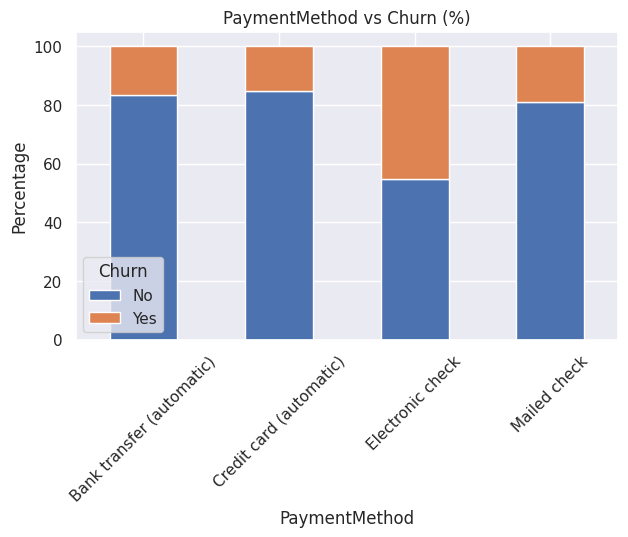

Churn            No    Yes
TotalCharges              
              100.0    0.0
100.2         100.0    0.0
100.25          0.0  100.0
100.35        100.0    0.0
100.4           0.0  100.0
...             ...    ...
997.75        100.0    0.0
998.1         100.0    0.0
999.45          0.0  100.0
999.8         100.0    0.0
999.9         100.0    0.0

[6531 rows x 2 columns]


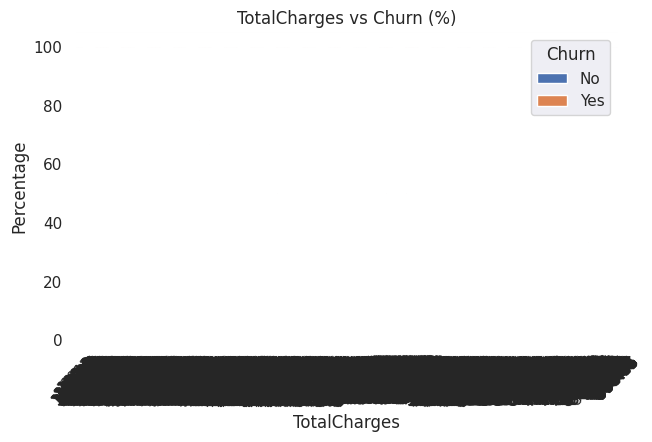

Churn     No    Yes
Churn              
No     100.0    0.0
Yes      0.0  100.0


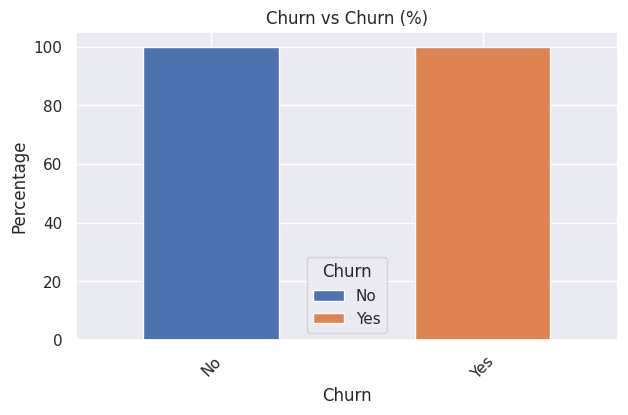

In [177]:
def plot_cat(col):
    ct = pd.crosstab(inputs[col], inputs["Churn"], normalize="index") * 100
    print(ct)

    ct.plot(kind="bar", stacked=True, figsize=(7,4))
    plt.title(f"{col} vs Churn (%)")
    plt.ylabel("Percentage")
    plt.xticks(rotation=45)
    plt.show()

for col in categorical_cols:
    plot_cat(col)


Churn                No        Yes
tenure_group                      
0–12          52.321839  47.678161
13–24         71.289062  28.710938
25–36         78.365385  21.634615
37–48         80.971129  19.028871
49–60         85.576923  14.423077
61–72         93.390192   6.609808


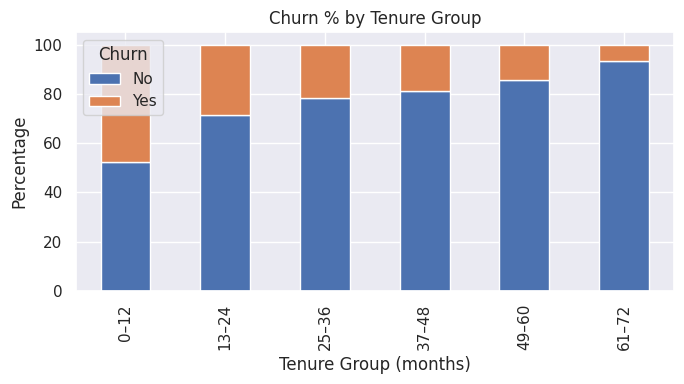

In [178]:
import pandas as pd

# Create tenure groups
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ["0–12", "13–24", "25–36", "37–48", "49–60", "61–72"]
inputs["tenure_group"] = pd.cut(inputs["tenure"], bins=bins, labels=labels, right=True)

# Churn rate per group
tenure_churn = pd.crosstab(inputs["tenure_group"], inputs["Churn"], normalize="index") * 100
print(tenure_churn)

tenure_churn.plot(kind="bar", stacked=True, figsize=(7,4))
plt.title("Churn % by Tenure Group")
plt.ylabel("Percentage")
plt.xlabel("Tenure Group (months)")
plt.legend(title="Churn")
plt.tight_layout()
plt.show()


Churn                No        Yes
charge_group                      
0–30          90.199637   9.800363
31–60         74.071146  25.928854
61–90         66.093881  33.906119
91–120        67.222542  32.777458


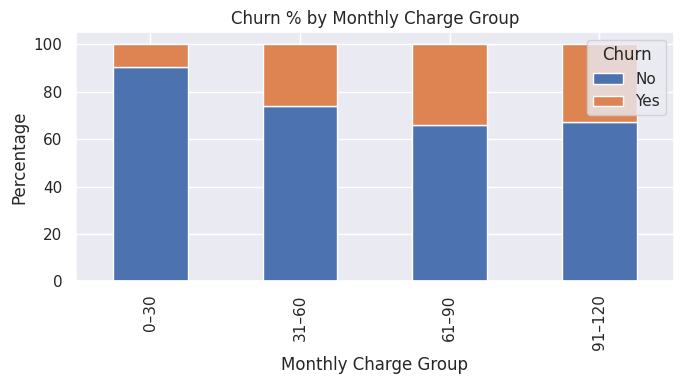

In [179]:
# Create monthly charge groups
charge_bins = [0, 30, 60, 90, 120]
charge_labels = ["0–30", "31–60", "61–90", "91–120"]
inputs["charge_group"] = pd.cut(inputs["MonthlyCharges"], bins=charge_bins, labels=charge_labels, right=True)

charge_churn = pd.crosstab(inputs["charge_group"], inputs["Churn"], normalize="index") * 100
print(charge_churn)

charge_churn.plot(kind="bar", stacked=True, figsize=(7,4))
plt.title("Churn % by Monthly Charge Group")
plt.ylabel("Percentage")
plt.xlabel("Monthly Charge Group")
plt.legend(title="Churn")
plt.tight_layout()
plt.show()


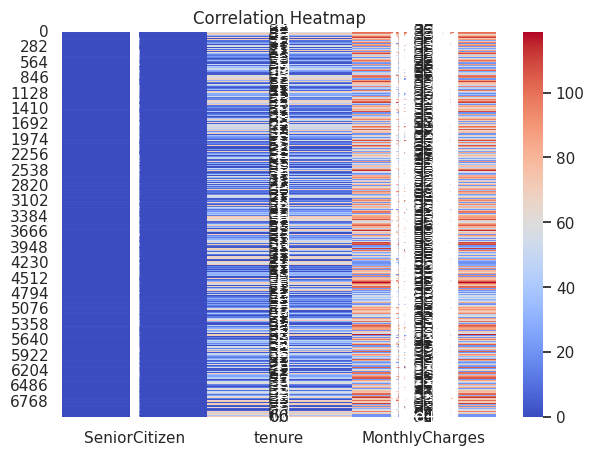

In [180]:
plt.figure(figsize=(7,5))
sns.heatmap(inputs[numeric_cols], annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# Data_Preprocessing

In [181]:
# Shape before duplicate drop
print("Shape before duplicate drop:", inputs.shape)
print()
inputs = inputs.drop_duplicates()
# Shape after duplicate drop
print("Shape after duplicate drop:", inputs.shape)

Shape before duplicate drop: (7043, 23)

Shape after duplicate drop: (7043, 23)


In [182]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

# Label encode target
inputs["Churn"] = inputs["Churn"].map({"No": 0, "Yes": 1})


In [183]:
# Remove rows where ANY column contains blank string or only spaces
inputs = inputs[~inputs.apply(lambda row: row.astype(str).str.strip().eq("").any(), axis=1)].reset_index(drop=True)

print("New shape after removing blank rows:", inputs.shape)

New shape after removing blank rows: (7032, 23)


In [184]:
inputs["TotalCharges"] = pd.to_numeric(inputs["TotalCharges"], errors="coerce")
inputs.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,charge_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0–12,0–30
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,0,25–36,31–60
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0–12,31–60
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37–48,31–60
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0–12,61–90
